<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Data%20Preprocessing/Feature%20Scaling%20and%20Transformation/4.%20Robust%20Scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 Robust Scaler (Outlier-Resistant Scaling)

The `RobustScaler` transforms features by removing the **median** and scaling them according to the **interquartile range (IQR)**.  
It is especially useful when the data contains **outliers**, as it is **less sensitive** to extreme values compared to `StandardScaler` or `MinMaxScaler`.

#### <u>Mathematical Formula</u>

$$
x' = \frac{x - \text{median}(x)}{IQR}
$$

Where:

- $x$: Original value  
- $x'$: Scaled value  
- $IQR = Q_3 - Q_1$: Interquartile range  
- $Q_1$: 25th percentile  
- $Q_3$: 75th percentile  

#### <u>When to Use `RobustScaler` ?</u>

- When the data contains marginal outliers.
- When we want a scale-invariant transformation without being skewed by extreme values.
- Works well for models that benefit from scaling (e.g., KNN, SVM), but where standard scaling fails due to outliers

#### <u>Effect on Data</u>

- Centers the data using median instead of mean.
- Scales data based on IQR, so extreme values are not pushed to the edges.
- Does not bound the data to a specific range like `[0, 1]`.
- Does **not** assume or enforce a specific distribution shape.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing   import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.svm             import SVR
from sklearn.pipeline        import Pipeline

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X = X.iloc[:,:-2]

In [ ]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def plots(df, var, t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before ' + str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('after ' + str(t).split('(')[0])

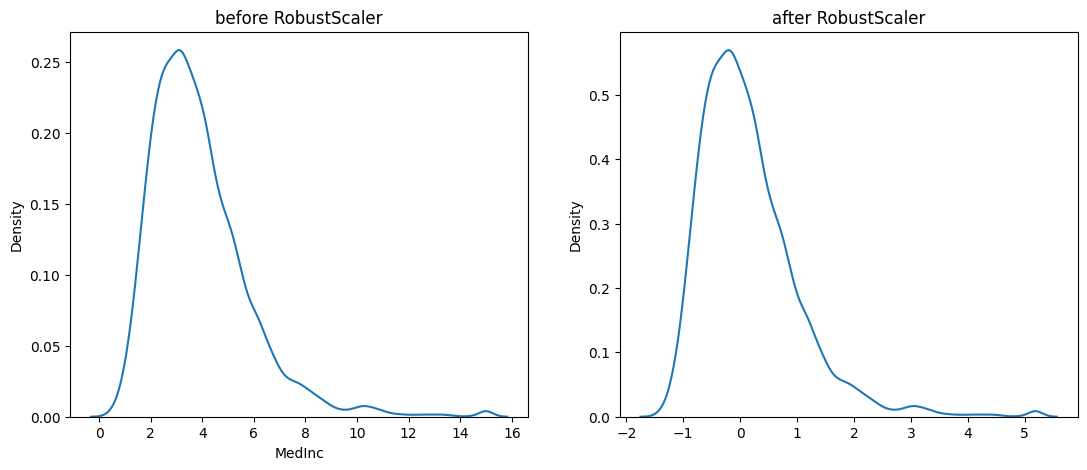

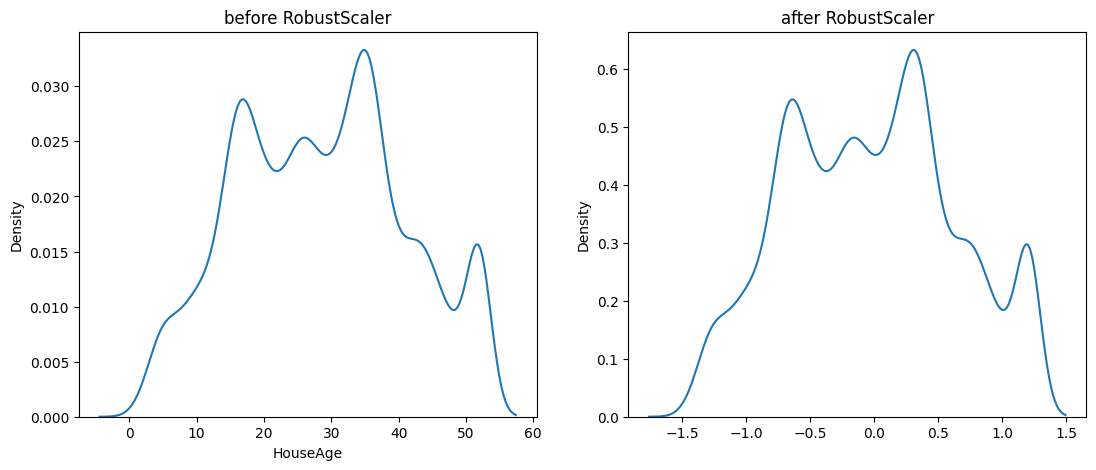

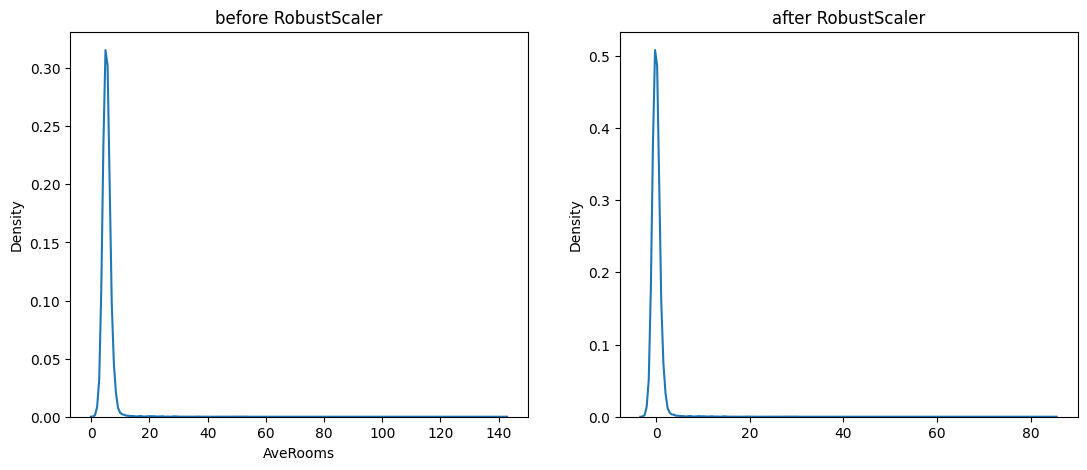

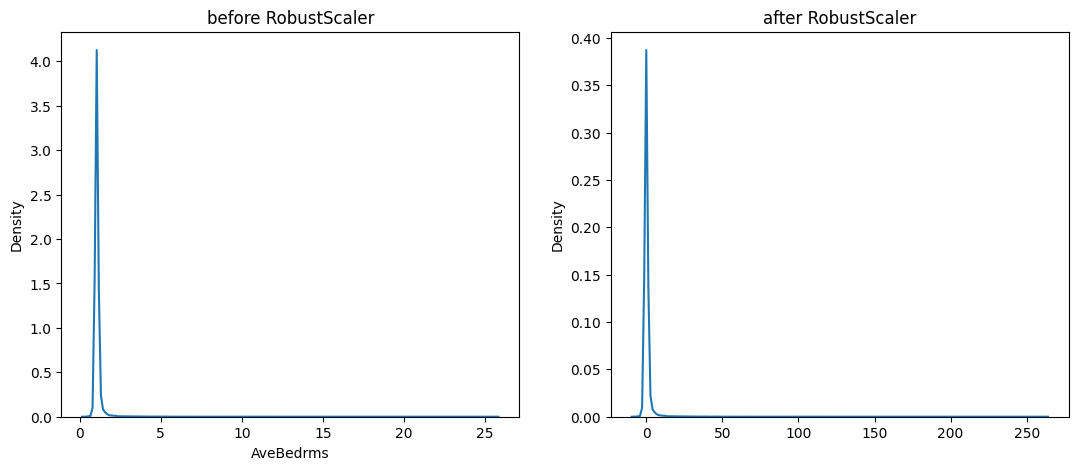

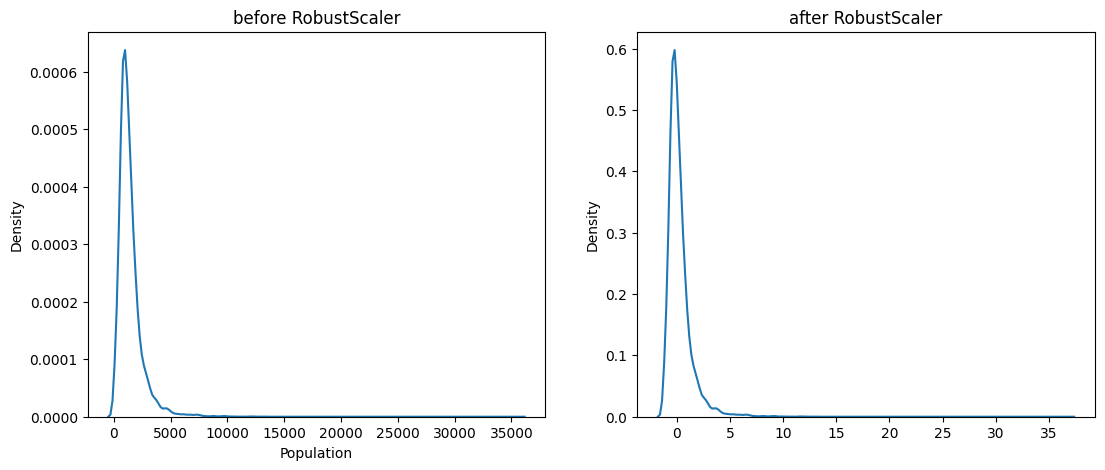

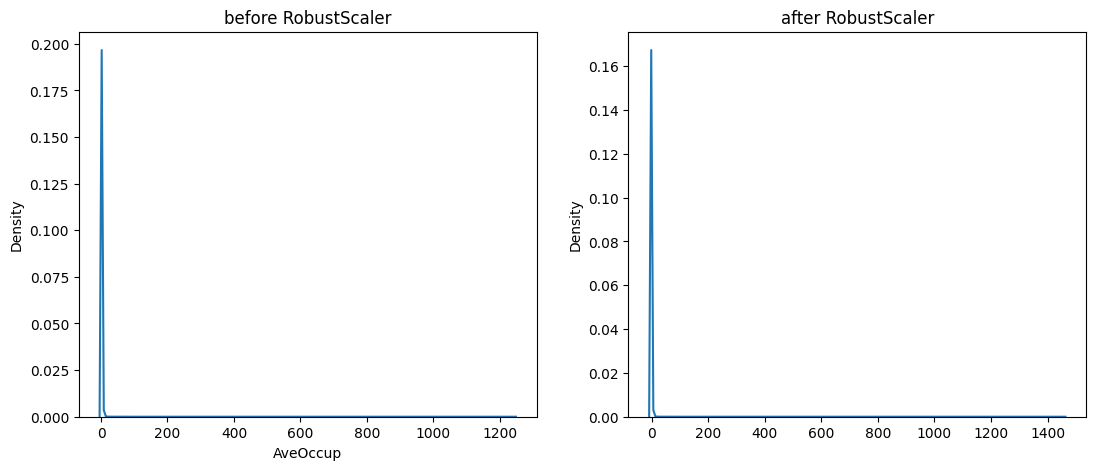

In [ ]:
for col in x_train.columns:
  plots(x_train, col, RobustScaler())

In [ ]:
def model_accuracy_scaled(mod):
  model_scaled = Pipeline([
      ('scale', RobustScaler()),
      ('model', mod)
  ])
  model_scaled.fit(x_train, y_train)
  return model_scaled.score(x_test, y_test)

def model_accuracy_unscaled(mod):
  model_unscaled = Pipeline([
      ('model', mod)
  ])
  model_unscaled.fit(x_train, y_train)
  return model_unscaled.score(x_test, y_test)

In [ ]:
# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Print accuracy scores
print(f"{'Model':<25} {'Unscaled R²':<15} {'Scaled R²'}")
print("-" * 55)
for name, model in models.items():
    unscaled_score = model_accuracy_unscaled(model)
    scaled_score = model_accuracy_scaled(model)
    print(f"{name:<25} {unscaled_score:<15.4f} {scaled_score:.4f}")

Model                     Unscaled R²     Scaled R²
-------------------------------------------------------
Linear Regression         0.5099          0.5099
KNN Regressor             0.1609          0.6135
SVR                       -0.0166         0.6101
Random Forest             0.6775          0.6775


Same Conclusions as stated earlier.